# **SPAM DETECTION**

### In this notebook I explore methods of spam detection:


|      model     | accuracy | f1-score | precision | recall |
|----------------|----------|----------|-----------|--------|
| Naive Bayes    | accuracy | f1-score | precision | recall |
| LLM classifier | accuracy | f1-score | precision | recall |
| SVM            | accuracy | f1-score | precision | recall |
| CatBoost       | accuracy | f1-score | precision | recall |
| LinearClassifer| accuracy | f1-score | precision | recall |

## imports & hyperparameters

In [19]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
import shutil
import os

In [20]:
DATASET_NAME = "naserabdullahalam/phishing-email-dataset"
DATA_PATH = Path("../../data") 
TRAIN_DATA_PATH = Path("../../data") / "train"
TRAIN_FILE_NAME = TRAIN_DATA_PATH / "train.csv"

## combine data

download data

In [21]:
# temp_path = kagglehub.dataset_download(DATASET_NAME)

# shutil.move(Path(temp_path), DATA_PATH) 

# (DATA_PATH / "1").rename(TRAIN_DATA_PATH)

# print(f'Files has been downloaded in {DATA_PATH}/train')

check class balance

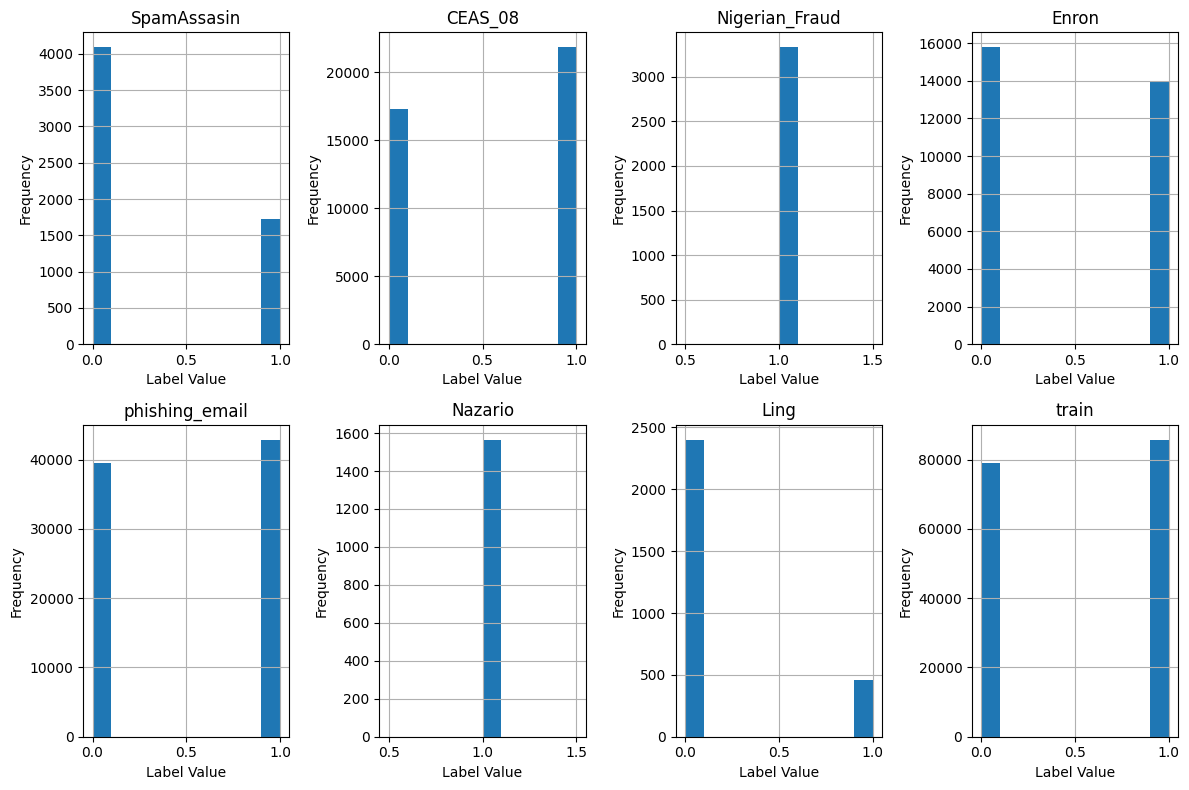

IN TOTAL:
 * spam - 171564
 * not spam - 158380


In [22]:
plt.figure(figsize=(12, 8))
zeros, ones = 0, 0
for ind, df_name in enumerate(os.listdir(TRAIN_DATA_PATH), start=1):
    df = pd.read_csv(TRAIN_DATA_PATH / df_name)
    plt.subplot(2, 4, ind)
    counted_val = df["label"].value_counts()

    if (len(counted_val) == 2):
        zeros += counted_val[0]
    ones += counted_val[1]

    df["label"].hist()
    plt.title(Path(df_name).stem)    
    plt.xlabel("Label Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

print(f"IN TOTAL:\n * spam - {ones}\n * not spam - {zeros}")

take a look at all datasets

In [23]:
spam_assasin_df = pd.read_csv(TRAIN_DATA_PATH / "SpamAssasin.csv")
spam_assasin_df.head()

,sender,receiver,date,subject,body,label,urls
0,Robert Elz <kre@munnari.OZ.AU>,Chris Garrigues <cwg-dated-1030377287.06fa6d@D...,"Thu, 22 Aug 2002 18:26:25 +0700",Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0,1
1,Steve Burt <Steve_Burt@cursor-system.com>,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoo...","Thu, 22 Aug 2002 12:46:18 +0100",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,1
2,"""Tim Chapman"" <timc@2ubh.com>",zzzzteana <zzzzteana@yahoogroups.com>,"Thu, 22 Aug 2002 13:52:38 +0100",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,1
3,Monty Solomon <monty@roscom.com>,undisclosed-recipient: ;,"Thu, 22 Aug 2002 09:15:25 -0400",[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,1
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,zzzzteana@yahoogroups.com,"Thu, 22 Aug 2002 14:38:22 +0100",Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,1


In [24]:
ceas_df = pd.read_csv(TRAIN_DATA_PATH / "CEAS_08.csv")
ceas_df.head()

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


In [25]:
nig_fraud_df = pd.read_csv(TRAIN_DATA_PATH / "Nigerian_Fraud.csv")
nig_fraud_df.head()

,sender,receiver,date,subject,body,urls,label
0,MR. JAMES NGOLA. <james_ngola2002@maktoob.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 02:38:20 +0000",URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...,0,1
1,Mr. Ben Suleman <bensul2004nng@spinfinder.com>,R@M,"Thu, 31 Oct 2002 05:10:00 -0000",URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",0,1
2,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 22:17:55 +0100",GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,0,1
3,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 22:44:20 -0000",GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,0,1
4,Maryam Abacha <m_abacha03@www.com>,R@M,"Fri, 01 Nov 2002 01:45:04 +0100",I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope...",0,1


In [26]:
enron_df = pd.read_csv(TRAIN_DATA_PATH / "Enron.csv")
enron_df.head()

,subject,body,label
0,"hpl nom for may 25 , 2001",( see attached file : hplno 525 . xls )\r\n- h...,0
1,re : nom / actual vols for 24 th,- - - - - - - - - - - - - - - - - - - - - - fo...,0
2,"enron actuals for march 30 - april 1 , 201","estimated actuals\r\nmarch 30 , 2001\r\nno flo...",0
3,"hpl nom for may 30 , 2001",( see attached file : hplno 530 . xls )\r\n- h...,0
4,"hpl nom for june 1 , 2001",( see attached file : hplno 601 . xls )\r\n- h...,0


In [27]:
phishing_df = pd.read_csv(TRAIN_DATA_PATH / "phishing_email.csv")
phishing_df.head()

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0


In [28]:
nazario_df = pd.read_csv(TRAIN_DATA_PATH / "Nazario.csv")
nazario_df.head()

,sender,receiver,date,subject,body,urls,label
0,Mail System Internal Data <MAILER-DAEMON@monke...,NaN,28 Sep 2017 09:57:25 -0400,DON'T DELETE THIS MESSAGE -- FOLDER INTERNAL DATA,This text is part of the internal format of yo...,1,1
1,cPanel <service@cpanel.com>,jose@monkey.org,"Fri, 30 Oct 2015 00:00:48 -0500",Verify Your Account,Business with \t\t\t\t\t\t\t\tcPanel & WHM \t...,1,1
2,Microsoft Outlook <recepcao@unimedceara.com.br>,NaN,"Fri, 30 Oct 2015 06:21:59 -0300 (BRT)",Helpdesk Mailbox Alert!!!,Your two incoming mails were placed on pending...,1,1
3,Ann Garcia <AnGarcia@mcoe.org>,"""info@maaaaa.org"" <info@maaaaa.org>","Fri, 30 Oct 2015 14:54:33 +0000",IT-Service Help Desk,Password will expire in 3 days. Click Here To ...,0,1
4,"""USAA"" <usaaacctupdate@sccu4u.com>",Recipients <usaaacctupdate@sccu4u.com>,"Fri, 30 Oct 2015 14:02:33 -0500",Final USAA Reminder - Update Your Account Now,"To ensure delivery to your inbox, please add U...",1,1


In [29]:
ling_df = pd.read_csv(TRAIN_DATA_PATH / "Ling.csv")
ling_df.head()

,subject,body,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


leave only mail and label and combine all datasets in one csv file

In [30]:
spam_assasin_df["mail"] = spam_assasin_df["subject"] + spam_assasin_df["body"]
spam_assasin_df = spam_assasin_df[["mail", "label"]]

ceas_df["mail"] = ceas_df["subject"] + ceas_df["body"]
ceas_df = ceas_df[["mail", "label"]]

nig_fraud_df["mail"] = nig_fraud_df["subject"] + nig_fraud_df["body"]
nig_fraud_df = nig_fraud_df[["mail", "label"]]

enron_df["mail"] = enron_df["subject"] + enron_df["body"]
enron_df = enron_df[["mail", "label"]]

phishing_df["mail"] = phishing_df["text_combined"]
phishing_df = phishing_df[["mail", "label"]]

nazario_df["mail"] = nazario_df["subject"] + nazario_df["body"]
nazario_df = nazario_df[["mail", "label"]]

ling_df["mail"] = ling_df["subject"] + ling_df["body"]
ling_df = ling_df[["mail", "label"]]


train_df = pd.concat([spam_assasin_df, ceas_df, nig_fraud_df, enron_df, phishing_df, nazario_df, ling_df], axis=0)
train_df = train_df.dropna()
train_df.to_csv(TRAIN_FILE_NAME, index=False)

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164624 entries, 0 to 2858
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   mail    164624 non-null  object
 1   label   164624 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ MB
